# requirements
tensorflow,
skimage,
numpy,
image folders

In [1]:
from skimage.transform import resize
from skimage import io

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_images(img_folder):
    #os library is used to scan the folder and store the filenames of the images
    filenames = [f.path for f in os.scandir(img_folder) if f.is_file() and f.path.endswith(('.png', '.jpg', '.jpeg'))]
    print('length of given folder is ',len(filenames))
    img = []
    #this loop reads the images data and store into array
    for i in range(len(filenames)):
        img.append(plt.imread(filenames[i]))
    res_img = []
    # resizing of images done using resize function from skimage library
    for i in range(len(img)) :
        res_img.append(resize(img[i], (100,100)))
    # converting list of images to array as neural network models take arrays as input not lists
    import numpy as np
    r_img = np.array(res_img)
    return r_img

In [3]:
A=get_images('positives')

length of given folder is  295


In [4]:
B=get_images('negatives')

length of given folder is  178


In [5]:
#we have read RGBA values of images, we need only RGB values so we have taken only first 3 values of each pixel
A=A[:,:,:,:3]

In [6]:
B=B[:,:,:,:3]

In [7]:
a=[]
b=[]
for i in range(len(A)):
    a.append(1)
for i in range(len(B)):
    b.append(0)

In [8]:
X=np.array(list(A)+list(B))
y=np.array(a+b)

In [9]:
#splitting data into training, testing and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2

In [10]:
#creating neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,BatchNormalization,Flatten,MaxPool2D
model=Sequential()
model.add(Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(BatchNormalization())          
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())          
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
#displaying our model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 160000)            640000    
_________________________________________________________________
dense (Dense)                (None, 78)                12480078  
_________________________________________________________________
dropout (Dropout)            (None, 78)                0

In [12]:
len(a)

295

In [13]:
len(b)

178

In [14]:
#fitting data into our model by training our model using training data, also validating our model using validation data wether the accuracy is increasing or not
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_val,y_val),batch_size=50)

Epoch 1/15
7/7 [==============================] - 25s 3s/step - loss: 0.9776 - accuracy: 0.5279 - val_loss: 2.7803 - val_accuracy: 0.3934
Epoch 2/15
7/7 [==============================] - 23s 3s/step - loss: 0.8318 - accuracy: 0.5777 - val_loss: 1.0851 - val_accuracy: 0.3934
Epoch 3/15
7/7 [==============================] - 23s 3s/step - loss: 0.8471 - accuracy: 0.5601 - val_loss: 0.7141 - val_accuracy: 0.5574
Epoch 4/15
7/7 [==============================] - 23s 3s/step - loss: 0.8046 - accuracy: 0.5953 - val_loss: 0.6810 - val_accuracy: 0.5738
Epoch 5/15
7/7 [==============================] - 23s 3s/step - loss: 0.6922 - accuracy: 0.6246 - val_loss: 0.6946 - val_accuracy: 0.5902
Epoch 6/15
7/7 [==============================] - 23s 3s/step - loss: 0.7210 - accuracy: 0.6246 - val_loss: 0.7110 - val_accuracy: 0.5902
Epoch 7/15
7/7 [==============================] - 23s 3s/step - loss: 0.7084 - accuracy: 0.6334 - val_loss: 0.7778 - val_accuracy: 0.5902
Epoch 8/15
7/7 [==================

In [15]:
#gives the probability of our image having a wire
pred=model.predict(X_test)
pred

array([[0.10300219],
       [0.34048328],
       [0.17846793],
       [0.35952637],
       [0.27735513],
       [0.09955013],
       [0.540092  ],
       [0.12838379],
       [0.22121787],
       [0.17538795],
       [0.21755794],
       [0.406731  ],
       [0.01850957],
       [0.44433802],
       [0.6828022 ],
       [0.5101247 ],
       [0.12787572],
       [0.22650519],
       [0.24230522],
       [0.08810696],
       [0.13433269],
       [0.20841768],
       [0.29687178],
       [0.04251319],
       [0.0191164 ],
       [0.17071211],
       [0.19018418],
       [0.13607794],
       [0.05052412],
       [0.06657273],
       [0.05297989],
       [0.42007375],
       [0.7426905 ],
       [0.43237242],
       [0.16756234],
       [0.23257723],
       [0.08556563],
       [0.11442801],
       [0.10505092],
       [0.43702096],
       [0.2372351 ],
       [0.19231206],
       [0.16129982],
       [0.48450288],
       [0.20308891],
       [0.04359692],
       [0.19604415],
       [0.226

In [16]:
L=[]
for i in pred:
    if i>0.65:
        L.append(1)
    else:
        L.append(0)

In [17]:
p=np.array(L)
p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [18]:
#preparing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        31
           1       1.00      0.10      0.18        40

    accuracy                           0.49        71
   macro avg       0.73      0.55      0.41        71
weighted avg       0.77      0.49      0.38        71



In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
# datA augmentation creates new images by rotating, width shifting etc which lets our model not to overfit
aug=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.5,1),
    shear_range=0.3,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,)

In [21]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2

In [22]:
#using vgg architecture 
vgg = VGG19(input_shape=(100,100,3), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [56]:
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
#creating model
model = Model(inputs=vgg.input, outputs=prediction)

In [57]:
#displaying the model architecture
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [58]:
model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [59]:
#training using vgg model
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_val,y_val),batch_size=50)

Epoch 1/15
7/7 [==============================] - 19s 3s/step - loss: 0.5603 - accuracy: 0.6921 - val_loss: 0.4163 - val_accuracy: 0.9180
Epoch 2/15
7/7 [==============================] - 15s 2s/step - loss: 0.3603 - accuracy: 0.9032 - val_loss: 0.2902 - val_accuracy: 0.9672
Epoch 3/15
7/7 [==============================] - 17s 3s/step - loss: 0.2750 - accuracy: 0.9150 - val_loss: 0.2311 - val_accuracy: 0.9672
Epoch 4/15
7/7 [==============================] - 17s 3s/step - loss: 0.2276 - accuracy: 0.9296 - val_loss: 0.2103 - val_accuracy: 0.9672
Epoch 5/15
7/7 [==============================] - 17s 2s/step - loss: 0.1952 - accuracy: 0.9531 - val_loss: 0.1763 - val_accuracy: 0.9672
Epoch 6/15
7/7 [==============================] - 17s 3s/step - loss: 0.1712 - accuracy: 0.9560 - val_loss: 0.1765 - val_accuracy: 0.9672
Epoch 7/15
7/7 [==============================] - 17s 2s/step - loss: 0.1577 - accuracy: 0.9560 - val_loss: 0.1620 - val_accuracy: 0.9672
Epoch 8/15
7/7 [==================

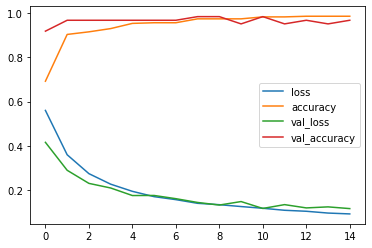

In [60]:
# plot of losses and accuracies, losses should decrease and accuracy should increase
import pandas as pd
hs=pd.DataFrame(model.history.history)
hs.plot()

In [61]:
pred=model.predict(X_test)
pred

array([[0.7002516 ],
       [0.0219641 ],
       [0.03055143],
       [0.9983389 ],
       [0.06540868],
       [0.79974526],
       [0.99608374],
       [0.02348691],
       [0.9830427 ],
       [0.19450325],
       [0.05847123],
       [0.9994957 ],
       [0.9948585 ],
       [0.99905574],
       [0.9939048 ],
       [0.5823847 ],
       [0.968524  ],
       [0.8817681 ],
       [0.98658025],
       [0.9969119 ],
       [0.9963854 ],
       [0.0619373 ],
       [0.99990726],
       [0.8768905 ],
       [0.9979011 ],
       [0.07886553],
       [0.03290522],
       [0.35724923],
       [0.17527303],
       [0.9989383 ],
       [0.02381036],
       [0.96590334],
       [0.99364734],
       [0.03171179],
       [0.9972265 ],
       [0.9999826 ],
       [0.37235808],
       [0.04175216],
       [0.99747145],
       [0.15927237],
       [0.96392   ],
       [0.99428356],
       [0.95073676],
       [0.1497767 ],
       [0.0520536 ],
       [0.6668899 ],
       [0.97173554],
       [0.996

In [71]:
L=[]
for i in pred:
    if i>0.8:  #we can set any threshold from 0.3 to 0.9
        L.append(1)
    else:
        L.append(0)

In [72]:
p=np.array(L)
p

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0])

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.97      0.90      0.94        40

    accuracy                           0.93        71
   macro avg       0.93      0.93      0.93        71
weighted avg       0.93      0.93      0.93        71



In [65]:
#need to have image in current directory
sample=plt.imread('varun photo.jpeg')

In [66]:
s=resize(sample,(100,100))

In [67]:
s.shape

(100, 100, 3)

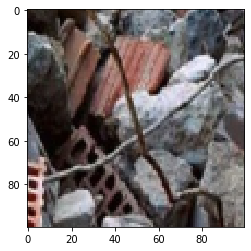

In [68]:
plt.imshow(s)

In [69]:
s=s.reshape(1,100,100,3)

In [70]:
model.predict(s)

array([[0.97964185]], dtype=float32)